# WHICH EXHIBITS THE GREATEST INFLUENCE ON PREMATURE DEATHS?
## FOR THE FOLLWING PARAMETERS:
* FAIR OR POOR HEALTH
* LOW BIRTHWEIGHT
* FOOD ENVIROMENT INDEX
* DRVING DEATH NUMBERS
* UNINSURED NUMBER
* MENTAL HEALTH PROVIDER RATIO

In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv(Path("merged_pop_df.csv"))
df.head(61)

,Unnamed: 0,County,Fair_or_Poor_Health_Percent,Low_birthweight_Percent,Food_Environment_Index,Mental_Health_Provider_Ratio,Death_Ratio,Driving_Death_Ratio,Uninsured_Ratio
0,0,Albany,12.916667,8.166667,6.008333,0.002971,0.009786,0.000304,0.050275
1,1,Allegany,15.500000,6.833333,6.150000,0.001483,0.012085,0.000529,0.060997
2,2,Bronx,26.666667,9.416667,5.491667,0.001508,0.010105,0.000165,0.098320
3,3,Broome,15.083333,7.750000,5.916667,0.001537,0.011685,0.000344,0.058646
4,4,Cattaraugus,18.250000,7.333333,6.133333,0.000867,0.013812,0.000583,0.074814
...,...,...,...,...,...,...,...,...,...
56,56,Warren,12.500000,6.750000,6.291667,0.002791,0.011907,0.000469,0.057920
57,57,Washington,15.750000,7.250000,6.308333,0.002083,0.012266,0.000695,0.065327
58,58,Wayne,16.250000,6.583333,6.416667,0.000679,0.011966,0.000594,0.061477
59,59,Westchester,13.166667,7.916667,6.808333,0.003411,0.007156,0.000202,0.069816


In [18]:
# update to not include features with Zero
df.groupby(['County']).mean(0)


,Unnamed: 0,Fair_or_Poor_Health_Percent,Low_birthweight_Percent,Food_Environment_Index,Mental_Health_Provider_Ratio,Death_Ratio,Driving_Death_Ratio,Uninsured_Ratio
County,,,,,,,,
Albany,0.0,12.916667,8.166667,6.008333,0.002971,0.009786,0.000304,0.050275
Allegany,1.0,15.500000,6.833333,6.150000,0.001483,0.012085,0.000529,0.060997
Bronx,2.0,26.666667,9.416667,5.491667,0.001508,0.010105,0.000165,0.098320
Broome,3.0,15.083333,7.750000,5.916667,0.001537,0.011685,0.000344,0.058646
Cattaraugus,4.0,18.250000,7.333333,6.133333,0.000867,0.013812,0.000583,0.074814
...,...,...,...,...,...,...,...,...
Washington,57.0,15.750000,7.250000,6.308333,0.002083,0.012266,0.000695,0.065327
Wayne,58.0,16.250000,6.583333,6.416667,0.000679,0.011966,0.000594,0.061477
Westchester,59.0,13.166667,7.916667,6.808333,0.003411,0.007156,0.000202,0.069816


In [19]:
df = df.rename(columns = {'Unnamed: 0':'County_Number'})


In [20]:
df.dtypes

County_Number                     int64
County                           object
Fair_or_Poor_Health_Percent     float64
Low_birthweight_Percent         float64
Food_Environment_Index          float64
Mental_Health_Provider_Ratio    float64
Death_Ratio                     float64
Driving_Death_Ratio             float64
Uninsured_Ratio                 float64
dtype: object

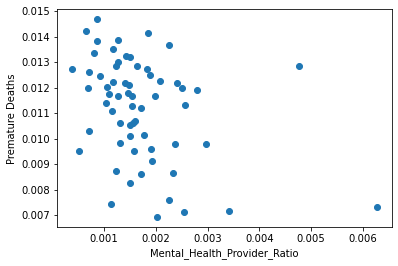

In [21]:
plt.scatter(df.Mental_Health_Provider_Ratio,df.Death_Ratio)
plt.xlabel('Mental_Health_Provider_Ratio')
plt.ylabel('Premature Deaths')
plt.show()

In [22]:
X = df.Mental_Health_Provider_Ratio.values.reshape(-1, 1)

In [23]:
X[:5]

array([[0.00297088],
       [0.00148318],
       [0.00150812],
       [0.0015374 ],
       [0.00086653]])

In [24]:
X.shape

(62, 1)

In [25]:
y = df.Death_Ratio

In [26]:
model = LinearRegression()

In [27]:
model.fit(X, y)

LinearRegression()

In [28]:
y_pred = model.predict(X)
print(y_pred.shape)

(62,)


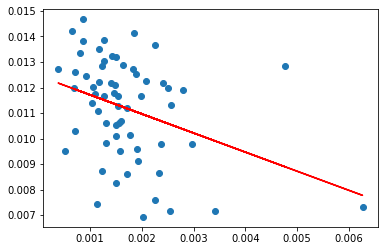

In [29]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [30]:
print(model.coef_)
print(model.intercept_)

[-0.74804189]
0.012460893148650542
